In [199]:
import numpy as np
import pandas as pd
import talib 
import tensorflow
import keras

In [200]:
import random
random.seed(1234)

In [201]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan18_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
dataset = dataset[21:30] ### ab 21 da hier CLOSE
dataset

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
21,163.20,164.13,161.94,162.43
22,161.34,161.79,158.87,158.94
23,158.10,158.37,150.00,152.55
24,150.52,155.48,149.25,155.31
25,154.16,155.28,153.43,153.95
26,152.32,153.16,147.50,147.54
27,148.84,150.54,144.41,149.51
28,150.81,152.39,150.30,151.41
29,150.90,151.15,149.65,150.79


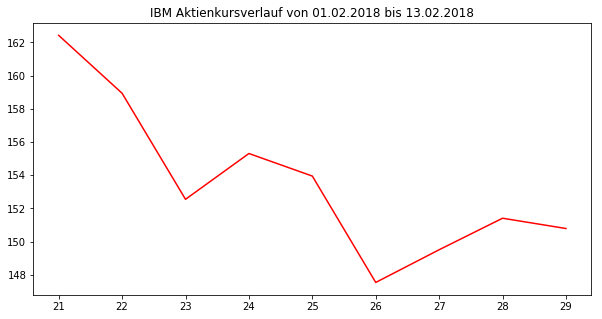

In [202]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['<CLOSE>']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='r')
pyplot.title('IBM Aktienkursverlauf von 01.02.2018 bis 13.02.2018')
pyplot.show()

In [203]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Close(t+1)']=dataset['<CLOSE>'].shift(-1)
#dataset["Preis_differenz"]=dataset['<CLOSE>']-dataset['<CLOSE>'].shift(-1)

In [204]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Close(t+1)
21,163.20,164.13,161.94,162.43,2.19,-0.77,158.94
22,161.34,161.79,158.87,158.94,2.92,-2.40,152.55
23,158.10,158.37,150.00,152.55,8.37,-5.55,155.31
24,150.52,155.48,149.25,155.31,6.23,4.79,153.95
25,154.16,155.28,153.43,153.95,1.85,-0.21,147.54
26,152.32,153.16,147.50,147.54,5.66,-4.78,149.51
27,148.84,150.54,144.41,149.51,6.13,0.67,151.41
28,150.81,152.39,150.30,151.41,2.09,0.60,150.79


In [205]:
X = dataset[['<CLOSE>', 'H-L','O-C',]]
y = dataset[['Close(t+1)']]

In [206]:
X

,<CLOSE>,H-L,O-C
21,162.43,2.19,-0.77
22,158.94,2.92,-2.40
23,152.55,8.37,-5.55
24,155.31,6.23,4.79
25,153.95,1.85,-0.21
26,147.54,5.66,-4.78
27,149.51,6.13,0.67
28,151.41,2.09,0.60


In [207]:
y

,Close(t+1)
21,158.94
22,152.55
23,155.31
24,153.95
25,147.54
26,149.51
27,151.41
28,150.79


In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [209]:
# ab 01.02.18 als training  --- 6 Tage
# 12.02 und 13.02 vorhersagen --- da t+1
X_train = X[:6]
X_test = X[6:]
y_train = y[:6]
y_test = y[6:]

In [210]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

6 2
6 2


In [211]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [212]:
knn = Sequential()
knn.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
knn.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
knn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [213]:
knn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [214]:
hist = knn.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 6 samples, validate on 2 samples
Epoch 1/50
 - 0s - loss: 0.3340 - val_loss: 0.0976
Epoch 2/50
 - 0s - loss: 0.3329 - val_loss: 0.0970
Epoch 3/50
 - 0s - loss: 0.3319 - val_loss: 0.0963
Epoch 4/50
 - 0s - loss: 0.3310 - val_loss: 0.0957
Epoch 5/50
 - 0s - loss: 0.3300 - val_loss: 0.0950
Epoch 6/50
 - 0s - loss: 0.3290 - val_loss: 0.0944
Epoch 7/50
 - 0s - loss: 0.3280 - val_loss: 0.0938
Epoch 8/50
 - 0s - loss: 0.3270 - val_loss: 0.0931
Epoch 9/50
 - 0s - loss: 0.3260 - val_loss: 0.0925
Epoch 10/50
 - 0s - loss: 0.3250 - val_loss: 0.0919
Epoch 11/50
 - 0s - loss: 0.3241 - val_loss: 0.0912
Epoch 12/50
 - 0s - loss: 0.3231 - val_loss: 0.0906
Epoch 13/50
 - 0s - loss: 0.3221 - val_loss: 0.0899
Epoch 14/50
 - 0s - loss: 0.3211 - val_loss: 0.0893
Epoch 15/50
 - 0s - loss: 0.3201 - val_loss: 0.0887
Epoch 16/50
 - 0s - loss: 0.3191 - val_loss: 0.0880
Epoch 17/50
 - 0s - loss: 0.3181 - val_loss: 0.0874
Epoch 18/50
 - 0s - loss: 0.3171 - val_loss: 0.0867
Epoch 19/50
 - 0s - loss: 0.316

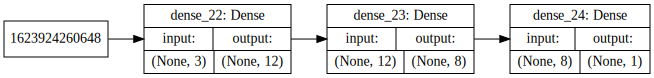

In [215]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(knn, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

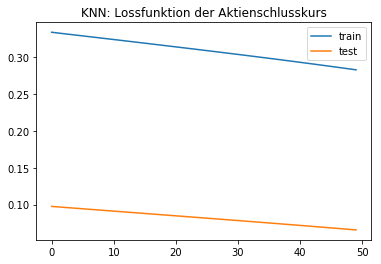

In [216]:
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.title('KNN: Lossfunktion der Aktienschlusskurs')
pyplot.legend()
pyplot.show()

In [217]:
y_pred = knn.predict(X_test)
#y_pred
#y_test

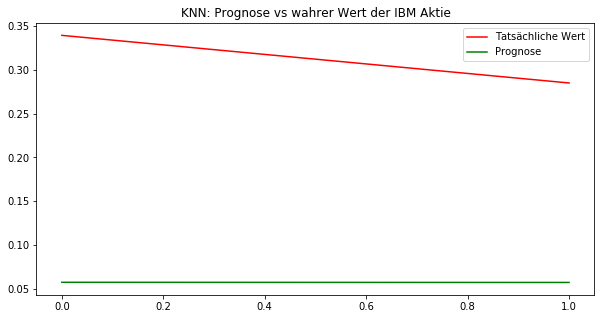

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='r', label='Tatsächliche Wert')
plt.plot(y_pred , color='g', label='Prognose')
plt.title('KNN: Prognose vs wahrer Wert der IBM Aktie')
plt.legend()
plt.show()

In [219]:
y_test

array([[0.33947368],
       [0.28508772]])

In [220]:
y_pred

array([[0.05745273],
       [0.05727556]], dtype=float32)

In [221]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.0657
Test RMSE: 0.2564


In [222]:
KP_knn_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_KNN_Close.txt",'w')
print(y_test,file=KP_knn_close)
KP_knn_close.close()

In [223]:
KP_knn_output_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Kurzzeit Output\\KP_KNN_Close_output.txt",'w')
print(y_pred,file=KP_knn_output_close)
KP_knn_output_close.close()